# <h1><center>Heart Attack Dataset -- Data Wrangling</center></h1>

## Import packages

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#check current directory
os.getcwd()

'D:\\Springboard\\Projects\\capstone2\\Heart-Attack\\notebooks'

## Read in the data

In [3]:
# Read in data from a csv file
brfss2002 = pd.read_csv('../raw_data/2022/heart_2022_with_nans.csv')

## Examine details about the dataset

In [4]:
#Examine info on this dataset
brfss2002.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

## Data Dictionary (From CDC documentation) <br>
**State**: State currently living in <br>
**Sex**: Sex of Respondent (1=Male; 2= Female) <br>
**GeneralHealth**: Would you say that in general your health is "1=Excellent, 2=Very good, 3=Good, 4=Fair, 5=Poor"? <br>
**PhysicalHealthDays**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good (0-30)? <br>
**MentalHealthDays**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good ((0-30))? <br>
**LastCheckupTime**: About how long has it been since you last visited a doctor for a routine checkup? <br>
    1: "Within past year (anytime less than 12 months ago)",  <br> 
    2: "Within past 2 years (1 year but less than 2 years ago)",  <br>
    3: "Within past 5 years (2 years but less than 5 years ago)",  <br>
    4: "5 or more years ago"<br>
**PhysicalActivities**: During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise? (1=Yes, 2=No) <br>
**SleepHours**: On average, how many hours of sleep do you get in a 24-hour period? <br>
**RemovedTeeth**: Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease? <br>
    1: "1 to 5",  <br>
    2: "6 or more, but not all",  <br>
    3: "All",  <br>
    8: "None of them" <br>
**HadHeartAttack**: (Ever told) you had a heart attack, also called a myocardial infarction? (1=Yes, 2=No) <br>
**HadAngina**: (Ever told) (you had) angina or coronary heart disease? (1=Yes, 2=No) <br>
**HadStroke**: (Ever told) (you had) a stroke? (1=Yes, 2=No) <br>
**HadAsthma**: (Ever told) (you had) asthma? (1=Yes, 2=No) <br>
**HadSkinCancer**: (Ever told) (you had) skin cancer that is not melanoma? (1=Yes, 2=No) <br>
**HadCOPD**:  (Ever told) (you had) C.O.P.D. (chronic obstructive pulmonary disease), emphysema or chronic bronchitis? (1=Yes, 2=No) <br>
**HadDepressiveDisorder**: (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)? (1=Yes, 2=No) <br>
**HadKidneyDisease**: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? (1=Yes, 2=No) <br>
**HadArthritis**: (Ever told) (you had) some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?  (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion, tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.) (1=Yes, 2=No) <br>
**HadDiabetes**: (Ever told) (you had) diabetes?  (If ´Yes´ and respondent is female, ask ´Was this only when you were pregnant?´. If Respondent says pre-diabetes or borderline diabetes, use response code 4.) <br>
    1: "Yes", <br>
    2: "Yes, but only during pregnancy (female)", <br>
    3: "No", <br>
    4: "No, pre-diabetes or borderline diabetes" <br>
**DeafOrHardOfHearing**: Are you deaf or do you have serious difficulty hearing? (1=Yes, 2=No) <br>
**BlindOrVisionDifficulty**: Are you blind or do you have serious difficulty seeing, even when wearing glasses? (1=Yes, 2=No) <br>
**DifficultyConcentrating**: Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions? (1=Yes, 2=No) <br>
**DifficultyWalking**: Do you have serious difficulty walking or climbing stairs? (1=Yes, 2=No) <br>
**DifficultyDressingBathing**: Do you have difficulty dressing or bathing? (1=Yes, 2=No) <br>
**DifficultyErrands**: Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor´s office or shopping? (1=Yes, 2=No) <br>
**SmokerStatus**: Four-level smoker status:  Everyday smoker, Someday smoker, Former smoker, Non-smoker <br>
    1: "Current smoker - now smokes every day", <br>
    2: "Current smoker - now smokes some days", <br>
    3: "Former smoker", <br>
    4: "Never smoked" <br>
**ECigaretteUsage**: Would you say you have never used e-cigarettes or other electronic vaping products in your entire life or now use them every day, use them some days, or used them in the past but do not currently use them at all? <br>
    1: "Never used e-cigarettes in my entire life", <br>
    2: "Use them every day", <br>
    3: "Use them some days", <br>
    4: "Not at all (right now)" <br>
**ChestScan**: Have you ever had a CT or CAT scan of your chest area? <br>
**RaceEthnicityCategory**:  Five-level race/ethnicity category <br>
    1: "White only, Non-Hispanic", <br>
    2: "Black only, Non-Hispanic", <br>
    3: "Other race only, Non-Hispanic", <br>
    4: "Multiracial, Non-Hispanic", <br>
    5: "Hispanic" <br>
**AgeCategory**: Fourteen-level age category <br>
    1: "Age 18 to 24", <br>
    2: "Age 25 to 29", <br>
    3: "Age 30 to 34", <br>
    4: "Age 35 to 39", <br>
    5: "Age 40 to 44", <br>
    6: "Age 45 to 49", <br>
    7: "Age 50 to 54", <br>
    8: "Age 55 to 59", <br>
    9: "Age 60 to 64", <br>
    10: "Age 65 to 69", <br>
    11: "Age 70 to 74", <br>
    12: "Age 75 to 79", <br>
    13: "Age 80 or older"  <br>
**HeightInMeters**: Reported height in meters <br>
**WeightInKilograms**: Reported weight in kilograms <br>
**BMI**: Body Mass Index (BMI) <br>
**AlcoholDrinkers**: Adults who reported having had at least one drink of alcohol in the past 30 days. <br>
**HIVTesting**: Adults who have ever been tested for HIV <br>
**FluVaxLast12**: During the past 12 months, have you had either flu vaccine that was sprayed in your nose or flu shot injected into your arm? <br>
**PneumoVaxEver**: Have you ever had a pneumonia shot also known as a pneumococcal vaccine? <br>
**TetanusLast10Tdap**: Have you received a tetanus shot in the past 10 years?  (If yes, ask: “Was this Tdap, the tetanus shot that also has pertussis or whooping cough vaccine?”) <br>
**HighRiskLastYear**: I am going to read you a list. When I am done, please tell me if any of the situations apply to you. You do not need to tell me which one. You have injected any drug other than those prescribed for you in the past year. You have been treated for a sexually transmitted disease or STD in the past year.  You have given or received money or drugs in exchange for sex in the past year. <br>
**CovidPos**: Has a doctor, nurse, or other health professional ever told you that you tested positive for COVID 19? <br>

## Drop irrelevant variables

In [5]:
#Drop irrelevant variables
columns_to_drop = ['HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
heart_data = brfss2002.drop(columns=columns_to_drop)
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

## The Heart Attack Dataset

In [6]:
#Number of columns and observations
heart_data.shape

(445132, 34)

In [7]:
#Look at the first few observations to get an idea
heart_data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes


### Examine missing data

#### Number Of Missing Values By Column

In [8]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of heart_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([heart_data.isnull().sum(), 100 * heart_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
ChestScan,56046,12.590872
BMI,48806,10.964388
AlcoholDrinkers,46574,10.462964
WeightInKilograms,42078,9.452926
ECigaretteUsage,35660,8.011107
SmokerStatus,35462,7.966626
HeightInMeters,28652,6.436742
DifficultyErrands,25656,5.763684
DifficultyConcentrating,24240,5.445576
DifficultyWalking,24012,5.394355


Although there are some missing data, the percentage is not too high. <br>
Note that there is 0.69% of missing data in our target variable: HadHeartAttack. There is 0.99% of missing data in a related heart disease variable: HadAngina

### Drop rows with missing on Heart Attack data

In [9]:
#Drop rows of missing data on Heart Attack
missing_heartattack = heart_data['HadHeartAttack'].isnull()
heart_data = heart_data[~missing_heartattack]
heart_data.shape

(442067, 34)

### Categorical Variables -- Descriptive Statistics

In [10]:
#Select categorical variables
heart_data.select_dtypes(include="object")

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers
0,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,No,NaN,No,No,No,No,...,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,No
1,Alabama,Female,Excellent,NaN,No,NaN,No,No,No,No,...,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,No
2,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,Yes,NaN,No,No,No,No,...,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,No
3,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,NaN,No,No,No,Yes,...,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,No
4,Alabama,Female,Fair,Within past year (anytime less than 12 months ...,Yes,NaN,No,No,No,No,...,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,Within past 2 years (1 year but less than 2 ye...,Yes,None of them,No,No,No,Yes,...,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,NaN
445128,Virgin Islands,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,No
445129,Virgin Islands,Female,Poor,5 or more years ago,No,1 to 5,No,No,No,No,...,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,NaN
445130,Virgin Islands,Male,Very good,Within past year (anytime less than 12 months ...,No,None of them,Yes,No,No,Yes,...,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,No


### Examine the freqeuncy of each category across all categorical variables in the data

In [11]:
#Write a function to plot through freqeuncy across all categorical variables
def plot_categorical_variables(df):
    '''A function that calculate the frequency and percentage of each category across all categorical variables'''
    # Get the list of categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Loop through each categorical column
    for column in categorical_columns:
        counts = df[column].value_counts()
        percs = df[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
        # Print column name as title
        print(f"\033[1m{column.center(50)}\033[0m")
        # Print an empty line
        print()
        # Print the statistics
        print(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))
        
    # Add a separator
        print("\n" + "="*50 + "\n")
              
plot_categorical_variables(heart_data)        

                      State                       

                      count percentage
State                                 
Washington            25997       5.9%
New York              17631       4.0%
Minnesota             16738       3.8%
Ohio                  16394       3.7%
Maryland              16299       3.7%
Texas                 14129       3.2%
Florida               13282       3.0%
Wisconsin             11210       2.5%
Kansas                11179       2.5%
Massachusetts         10958       2.5%
California            10853       2.5%
Maine                 10584       2.4%
Indiana               10378       2.3%
Virginia              10353       2.3%
Arizona               10089       2.3%
South Carolina         9967       2.3%
Michigan               9958       2.3%
Utah                   9773       2.2%
Connecticut            9702       2.2%
Colorado               9310       2.1%
Georgia                9163       2.1%
Iowa                   8882       2.0%
Vermont     

              RaceEthnicityCategory               

                                count percentage
RaceEthnicityCategory                           
White only, Non-Hispanic       318782      74.4%
Hispanic                        42524       9.9%
Black only, Non-Hispanic        35116       8.2%
Other race only, Non-Hispanic   22442       5.2%
Multiracial, Non-Hispanic        9505       2.2%


                   AgeCategory                    

                 count percentage
AgeCategory                      
Age 65 to 69     46808      10.8%
Age 60 to 64     44208      10.2%
Age 70 to 74     43199      10.0%
Age 55 to 59     36628       8.5%
Age 80 or older  35738       8.2%
Age 50 to 54     33461       7.7%
Age 75 to 79     32242       7.4%
Age 40 to 44     29792       6.9%
Age 45 to 49     28405       6.6%
Age 35 to 39     28385       6.6%
Age 18 to 24     26798       6.2%
Age 30 to 34     25695       5.9%
Age 25 to 29     21901       5.1%


                 AlcoholDrinkers       

In [12]:
# How many states are there in this dataset
heart_data['State'].nunique()

#This list includes the District of Columbia andother territories such as Guam, Puerto Rico, and Virgin Islands

54

### Examine Heart Attack by State

In [13]:
# Heart Attack by State

# Calculate the total count of instances for each state
total_counts = heart_data.groupby('State')['HadHeartAttack'].count()

# Filter the DataFrame to include only the rows where HadHeartAttack is "Yes"
heart_attack_yes = heart_data[heart_data['HadHeartAttack'] == 'Yes']

# Calculate the percentage of "Yes" cases for each state based on the total count
heart_attack_percent = (heart_attack_yes.groupby('State')['HadHeartAttack'].count() / total_counts * 100).round(1).astype(str) + '%'

# Sort the Series from highest to lowest percentage
heart_attack_percent_sorted = heart_attack_percent.sort_values(ascending=False).astype(str)

# Display the result
print(heart_attack_percent_sorted)

State
West Virginia           9.0%
Arkansas                8.7%
Florida                 7.7%
New Hampshire           7.5%
Oklahoma                7.2%
Kentucky                7.2%
Tennessee               7.1%
Maine                   7.1%
Alabama                 7.0%
Arizona                 7.0%
Ohio                    6.9%
South Dakota            6.7%
Nebraska                6.6%
New Mexico              6.5%
Missouri                6.4%
Indiana                 6.3%
Georgia                 6.2%
Nevada                  6.2%
North Dakota            6.2%
Louisiana               6.2%
Montana                 6.1%
Wyoming                 6.1%
Texas                   6.0%
Michigan                5.9%
South Carolina          5.9%
Wisconsin               5.7%
Virginia                5.7%
Kansas                  5.7%
Rhode Island            5.7%
Guam                    5.5%
Alaska                  5.5%
Vermont                 5.4%
Maryland                5.4%
Mississippi             5.4%
Pennsylv

### Continuous Variables -- Descriptive Statistics

In [14]:
#Descriptive statistics of numeric variables
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,431470.0,4.322639,8.662400,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,433275.0,4.371406,8.372727,0.00,0.00,0.00,5.00,30.00
SleepHours,436871.0,7.023268,1.496407,1.00,6.00,7.00,8.00,24.00
HeightInMeters,413926.0,1.702758,0.107142,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,400601.0,83.077346,21.439283,22.68,68.04,80.74,95.25,292.57
BMI,393957.0,28.527818,6.550960,12.02,24.13,27.44,31.74,99.64


#### Distributions

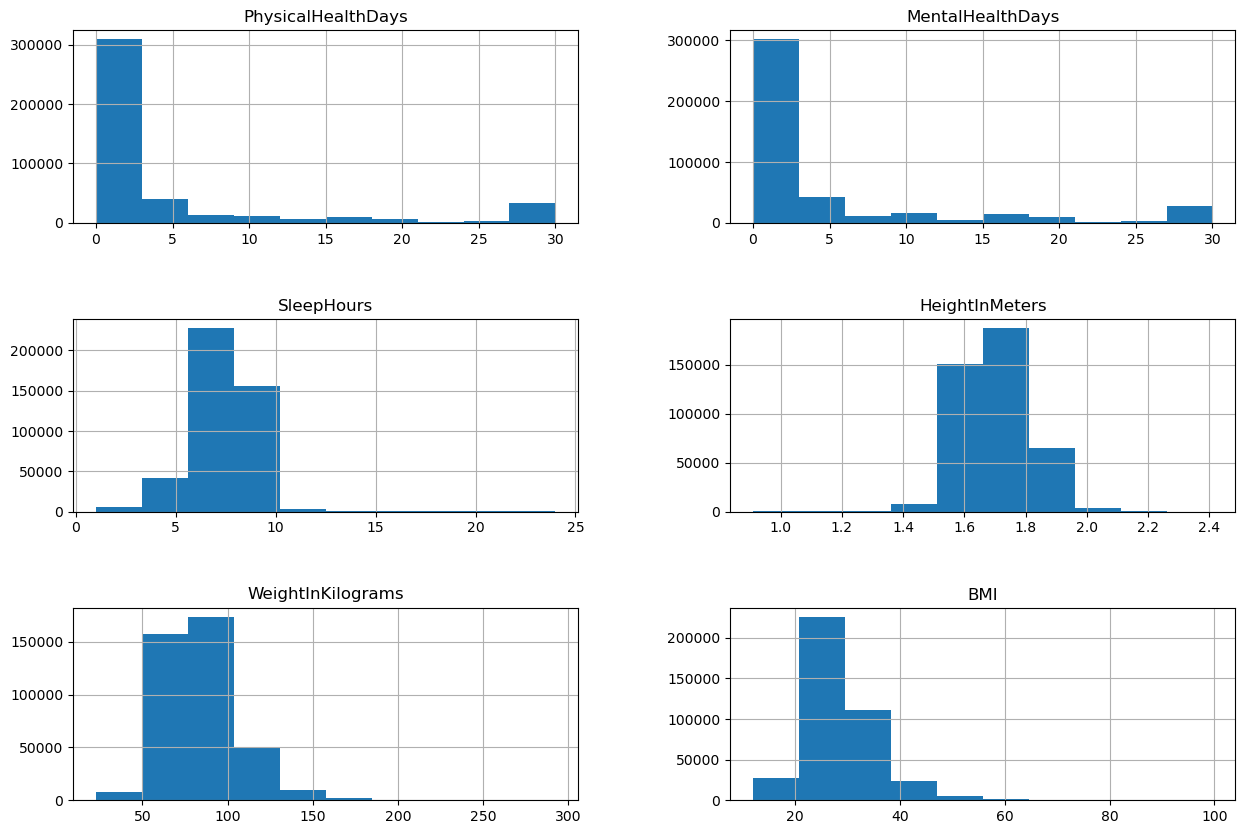

In [15]:
heart_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

#### Examine outliers

In [16]:
#Examine outliers
print(heart_data.SleepHours[heart_data.SleepHours > 22])
print(heart_data.WeightInKilograms[heart_data.WeightInKilograms < 30])
print(heart_data.WeightInKilograms[heart_data.WeightInKilograms > 280])
print(heart_data.HeightInMeters[heart_data.HeightInMeters < 1])
print(heart_data.HeightInMeters[heart_data.HeightInMeters > 2.3])

3972      23.0
8043      24.0
10152     24.0
11497     23.0
13275     23.0
          ... 
361381    24.0
365658    24.0
374829    24.0
377151    23.0
413927    24.0
Name: SleepHours, Length: 67, dtype: float64
11310     24.00
22437     29.48
29424     27.22
29781     25.40
31383     29.48
          ...  
399114    24.04
416372    29.48
430290    28.12
432365    29.48
436749    28.58
Name: WeightInKilograms, Length: 71, dtype: float64
5988      281.00
17744     292.57
48272     284.86
174601    290.30
174691    285.00
352015    280.32
353880    281.68
434085    290.30
Name: WeightInKilograms, dtype: float64
9097      0.91
23785     0.91
25075     0.91
25369     0.99
25642     0.91
45118     0.91
53433     0.91
69868     0.91
106579    0.91
106662    0.91
121126    0.91
152610    0.97
164227    0.91
172763    0.97
185081    0.92
186028    0.91
190819    0.91
248742    0.91
319619    0.97
323735    0.91
335712    0.97
354814    0.91
355547    0.91
358433    0.91
359468    0.91
371206    0

As there are many of these "extreme" cases, they do not appear to be data entry errors. Let's keep them.

### Save data as a cleaned dataset

In [17]:
path = 'D:\\Springboard\\Projects\\capstone2\\Heart-Attack\\data\\'
heart_data.to_csv(path+'heartattack_cleaned.csv', index=False)

## Summary

&emsp;&emsp;The data is from BRFSS 2022 survey conducted by the Center for Disease Control (CDC). The dataset has been previously minimally processed and shared at Kaggle (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data). This dataset contains 40 columns and 445132 observations. Each observation is a person. <br>
&emsp;&emsp;First, I dropped 6 variables that are likely irrelevant in predicting heart attack. Second, I examined the extent of missing data. The variable with the most missing data is ChestScan, with about 12.6% of missing data. The target feature, HadHeartAttack has about 0.7% of missing data (3065 observations). Therefore, I dropped rows with missing data on the HadHeartAttack variable, the target feature. It is not clear what the best way of dealing with missing data in other variables (i.e., potential predictors of heart attack) is at this point. Therefore, they will be left as they are for now. The final dataset contains 34 columns and 442067 observations. <br>
&emsp;&emsp;Next, I examined descriptive statistics of all the categorical variables in the dataset. It is obvious that a lot of the categorical variables are very imbalanced (e.g., about 5.7% of individuals had heart attack before). I also examined the percentage of having had heart attack by States and found that West Virginia (9.0%) and Arkansas (8.7%) are on top of the list, whereas California (4.1%), Colorado (4.0%), Virgin Islands (4.0%), and the District of Columnbia (3.4%) had the least prevalence in this sample. <br>
&emsp;&emsp;Then, I examined the distributions of the continuous variables and possible outliers in the data. I examined these outliers more closely, but they did not appear to be data entry errors, so I decided to keep them for now. Lastly, I saved the data as a cleaned dataset called "heartattack_cleaned.csv' for later use.